Roberta Model Fine Tune

In [ ]:
from price_prediction_model_src.roberta_base_fine_tune import train_model

trainer, model, tok, dataset = train_model(
    source="ed-donner/pricer-data",
    text_column="text",
    label_column="price",
    epochs=3,
    batch_size=16,
    eval_steps=500
)


/home/lisa/anaconda3/envs/llm_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Map: 100%|██████████| 2000/2000 [00:00<00:00, 11673.61 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/lisa/Arupreza/ShopAI/model_src/roberta_base_fine_tune.py:157: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss,Validation Loss,Rmse,Mae,R2
500,15.544700,14.559072,287.939575,217.006348,-1.314369
1000,0.977900,0.890997,176.437424,120.645210,0.131017
1500,0.694600,0.703207,158.974655,112.898949,0.294518
2000,0.195600,0.188815,169.201813,110.696526,0.200829
2500,0.093400,0.080346,122.888908,75.294235,0.578444
3000,0.068400,0.043254,109.873390,56.812489,0.663012
3500,0.052400,0.030408,84.135246,43.545132,0.802400
4000,0.046800,0.032830,100.425034,47.959381,0.718477
4500,0.040100,0.031249,96.855003,46.911621,0.738137
5000,0.035100,0.016704,75.063004,32.138050,0.842717


Validation metrics: {'eval_loss': 0.016085434705018997, 'eval_rmse': 73.46728515625, 'eval_mae': 31.877796173095703, 'eval_r2': 0.8493330711305338, 'eval_runtime': 39.7625, 'eval_samples_per_second': 1005.974, 'eval_steps_per_second': 62.873, 'epoch': 0.7111111111111111}
Test metrics: {'eval_loss': 1.402895450592041, 'eval_rmse': 224.31961059570312, 'eval_mae': 154.30364990234375, 'eval_r2': -0.4710033425457487, 'eval_runtime': 2.0528, 'eval_samples_per_second': 974.258, 'eval_steps_per_second': 60.891, 'epoch': 0.7111111111111111}
✅ Model saved to ./price_roberta_lora


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


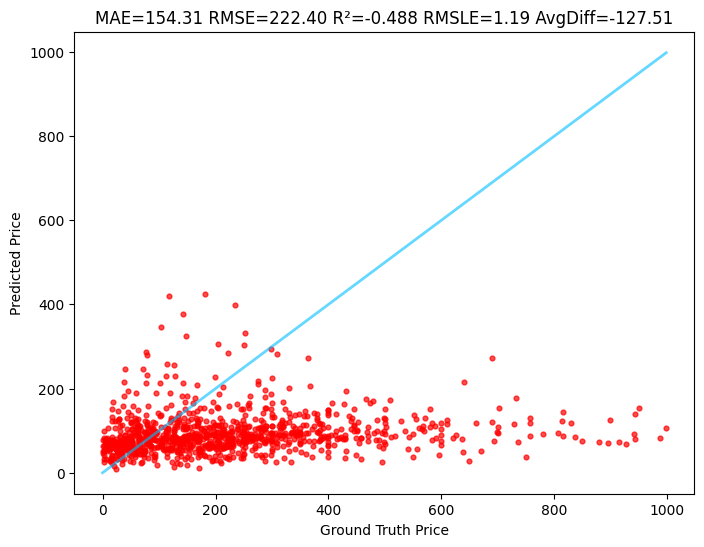

{'mae': 154.31402530077656, 'rmse': 222.39675161721857, 'r2': -0.4883020307624757, 'rmsle': 1.1910769360450686, 'avg_diff': -127.51351284671159}


In [ ]:
from price_prediction_model_src.evaluation import evaluate_model

metrics = evaluate_model("price_prediction_peft/price_roberta_lora/checkpoint-6500", num_samples=1000)
print(metrics)

Llama Model Fine Tune

In [ ]:
from price_prediction_model_src.llama_8_b_base_fine_tune import train_sft

trainer, model, tokenizer, ds = train_sft(
    hf_user="Arupreza",
    dataset_name="ed-donner/pricer-data",
    base_model="meta-llama/Meta-Llama-3.1-8B",
    project_name="pricer",
    log_to_wandb=True,
    epochs=1,
    batch_size=4,
    save_steps=2000,
    run_name="debug_run",
    push_to_hub=False,       # don’t push when debugging
    train_size=1000,       # optional: subset
    eval_size=100           # optional: subset
)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/lisa/.netrc
wandb: Currently logged in as: arupreza (arupreza-soonchunhyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Map:   0%|          | 0/400000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Memory footprint: 5591.5 MB


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'pad_token_id': 128001}.


Step,Training Loss,Validation Loss
200,2.315800,2.230994


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


eval/loss,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▃▅▆▆██
train/global_step,▁▃▅▆▆██
train/grad_norm,▂▁▂▂█
train/learning_rate,█▆▄▂▁
train/loss,█▂▁▂▂
eval/loss,2.23099
eval/runtime,20.4774


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Memory footprint: 5700.6 MB
1: Guess: $329.50 Truth: $374.41 Error: $44.91 SLE: 0.02 Item: OEM AC Compressor w/...
2: Guess: $158.25 Truth: $225.11 Error: $66.86 SLE: 0.12 Item: Motorcraft YB3125 Fa...
3: Guess: $44.69 Truth: $61.68 Error: $16.99 SLE: 0.10 Item: Dorman Front Washer ...
4: Guess: $486.00 Truth: $599.99 Error: $113.99 SLE: 0.04 Item: HP Premium HD Plus T...
5: Guess: $18.14 Truth: $16.99 Error: $1.15 SLE: 0.00 Item: Super Switch Pickup ...
6: Guess: $12.98 Truth: $31.99 Error: $19.01 SLE: 0.74 Item: Horror Bookmarks, Re...
7: Guess: $149.75 Truth: $101.79 Error: $47.96 SLE: 0.15 Item: SK6241 - Stinger 4 G...
8: Guess: $270.25 Truth: $289.00 Error: $18.75 SLE: 0.00 Item: Godox ML60Bi LED Lig...
9: Guess: $771.00 Truth: $635.86 Error: $135.14 SLE: 0.04 Item: Randall G3 Plus Comb...
10: Guess: $76.12 Truth: $65.99 Error: $10.14 SLE: 0.02 Item: HOLDWILL 6 Pack LED ...
11: Guess: $256.50 Truth: $254.21 Error: $2.29 SLE: 0.00 Item: Viking Horns 3 Gallo...
12: Guess: $403.00 Tr

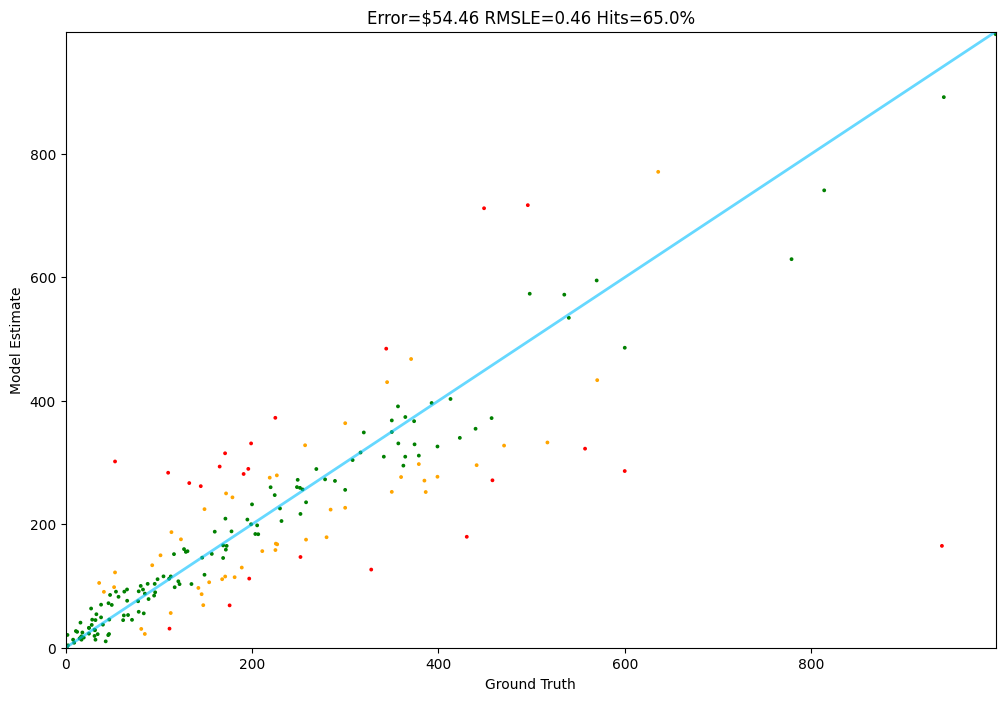

{'avg_error': 54.464722070312526, 'rmsle': 0.46026090647832746, 'hits_percent': 65.0}


In [ ]:
from price_prediction_model_src.evaluation import llama_evaluation
results = llama_evaluation("/home/lisa/Arupreza/ShopAI/price_prediction_peft/price_llama_lora/checkpoint-20000", test_amount=200)
print(results)

Qwen 8 B Fine Tune

In [ ]:
from price_prediction_model_src.qwen_3_8_b_fine_tune import train_sft

trainer, model, tokenizer, ds = train_sft(
    hf_user="Arupreza",
    dataset_name="ed-donner/pricer-data",
    base_model="Qwen/Qwen3-8B",     # ✅ dense version
    project_name="price_qwen_lora",
    log_to_wandb=True,
    epochs=5,
    batch_size=12,
    grad_accum=2,
    save_steps=1000,
    run_name="trial_1",
    push_to_hub=False,
    train_size=100000,
    eval_size=1000
)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/lisa/.netrc
wandb: Currently logged in as: arupreza (arupreza-soonchunhyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Memory footprint: 5962.8 MB


The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


Step,Training Loss,Validation Loss
200,2.604400,2.574637
400,2.450700,2.424467
600,2.332800,2.365294
800,2.297100,2.302678
1000,2.254000,2.253749
1200,2.202700,2.223572
1400,2.240100,2.196068
1600,2.182700,2.173706
1800,2.158600,2.156249
2000,2.159800,2.140558


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


eval/loss,█▇▅▅▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/runtime,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/samples_per_second,█▇▅▄▄▅▅▅▅▄▅▄▆▅▄▅▅▅▄▄▅▄▅▅▄▄▄▄▃▄▃▃▃▃▃▂▂▂▂▁
eval/steps_per_second,▂▆▄█▇▄▅▄▄▄▄▅▅▅▆▄▅▅▅▄▅▄▄▅▅▄▅▄▄▃▃▃▃▃▃▂▂▂▂▁
train/epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▇▇▇▇████
train/global_step,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██
train/grad_norm,▁▂▃▂▂▂▁▂▃▅▄▄▄▅▆▅▄▆▆▆▄▅▆▅▅▆▆▃▅▆▄▄▄▆▅▇▆█▇▇
train/learning_rate,██████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
train/loss,█▇▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
eval/loss,1.83542
eval/runtime,218.5183


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Memory footprint: 6137.4 MB
1: Guess: $232.00 Truth: $374.41 Error: $142.41 SLE: 0.23 Item: How much does this cost to the nearest d
2: Guess: $151.00 Truth: $225.11 Error: $74.11 SLE: 0.16 Item: How much does this cost to the nearest d
3: Guess: $101.00 Truth: $61.68 Error: $39.32 SLE: 0.24 Item: How much does this cost to the nearest d
4: Guess: $300.00 Truth: $599.99 Error: $299.99 SLE: 0.48 Item: How much does this cost to the nearest d
5: Guess: $109.00 Truth: $16.99 Error: $92.01 SLE: 3.28 Item: How much does this cost to the nearest d
6: Guess: $10.00 Truth: $31.99 Error: $21.99 SLE: 1.21 Item: How much does this cost to the nearest d
7: Guess: $102.00 Truth: $101.79 Error: $0.21 SLE: 0.00 Item: How much does this cost to the nearest d
8: Guess: $299.00 Truth: $289.00 Error: $10.00 SLE: 0.00 Item: How much does this cost to the nearest d
9: Guess: $599.00 Truth: $635.86 Error: $36.86 SLE: 0.00 Item: How much does this cost to the nearest d
10: Guess: $100.00 Truth: $65.99 Error:

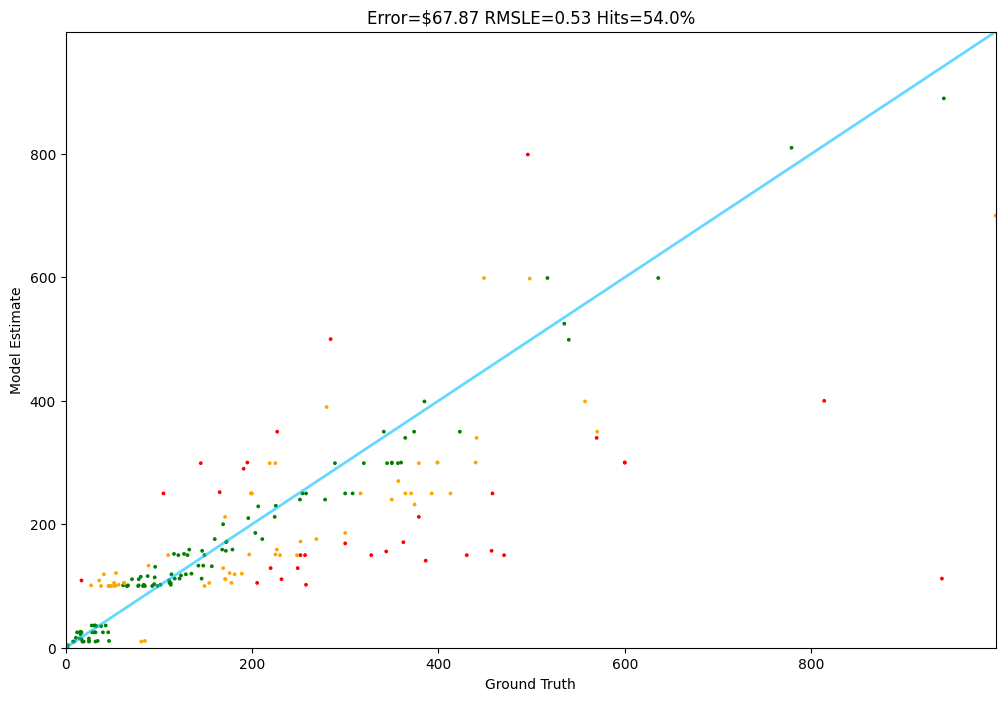

{'avg_error': 67.87235000000004, 'rmsle': 0.534658496327335, 'hits_percent': 54.0}


In [3]:
from price_prediction_model_src.evaluation import qwen_evaluation

results = qwen_evaluation("price_prediction_peft/price_qwen_lora/checkpoint-14000", test_amount=200)
print(results)

GPT-2 Fine Tune

In [ ]:
from price_prediction_model_src.gpt_2_fine_tune import train_sft 

trainer, model, tokenizer, ds = train_sft(
    hf_user="Arupreza",
    dataset_name="ed-donner/pricer-data",
    base_model="gpt2-large",    # or gpt2-large if GPU allows
    project_name="price",
    log_to_wandb=True,
    epochs=5,                    # real training
    batch_size=8,
    save_steps=10000,
    run_name="gpt_2_lora",
    push_to_hub=False             # optional, only if you want to share
)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/lisa/.netrc
wandb: Currently logged in as: arupreza (arupreza-soonchunhyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'pad_token_id': 50256}.


`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Step,Training Loss,Validation Loss
200,3.511600,3.386027
400,3.230300,3.197362
600,3.164700,3.138412
800,3.122300,3.092070
1000,3.060900,3.050800
1200,3.098100,3.012920
1400,3.028900,2.980808
1600,3.067600,2.950620
1800,2.977200,2.925088
2000,2.995500,2.901816


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


eval/loss,█▇▆▆▆▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/runtime,▃▁▁▁▄▂▁▂▂▂▁▁▂▂▁▁▂▃▄▃▁▄▅▃▅▅▄▄▃▄▂▆▆▆▃▆▇▆▅█
eval/samples_per_second,▅▄▄▄▄▇▇▇███▆██▇▆▅▄▅▃▄▆▅▅▅▄▄▆▆▆▁▄▂▂▂▂▁▂▃▂
eval/steps_per_second,▅▆█▅█▅▇▇▇▆██▄▆▇▇███▆▆▄▄▇▄▄▄▄▇▆▅▅▅▅▅▃▃▃▅▁
train/epoch,▁▁▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇████
train/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇███
train/grad_norm,█▅▆▅▄▂▂▂▂▃▃▂▂▂▁▄▂▃▂▃▂▅▄▄▄▅▅▅▄▄▄▅▄▃▃▃▄▃▃▄
train/learning_rate,▂▃▇▇██████▇▇▇▇▇▆▆▆▆▆▅▅▅▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁
train/loss,█▆▆▇▆▆▅▆▆▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁
eval/loss,1.58707
eval/runtime,52.2283


Memory footprint: 3133.9 MB
1: Guess: $342.11 Truth: $374.41 Error: $32.30 SLE: 0.01 Item: OEM AC Compressor w/...
2: Guess: $138.35 Truth: $225.11 Error: $86.76 SLE: 0.23 Item: Motorcraft YB3125 Fa...
3: Guess: $27.97 Truth: $61.68 Error: $33.71 SLE: 0.60 Item: Dorman Front Washer ...
4: Guess: $448.43 Truth: $599.99 Error: $151.56 SLE: 0.08 Item: HP Premium HD Plus T...
5: Guess: $45.70 Truth: $16.99 Error: $28.71 SLE: 0.91 Item: Super Switch Pickup ...
6: Guess: $6.95 Truth: $31.99 Error: $25.04 SLE: 2.03 Item: Horror Bookmarks, Re...
7: Guess: $71.84 Truth: $101.79 Error: $29.95 SLE: 0.12 Item: SK6241 - Stinger 4 G...
8: Guess: $265.14 Truth: $289.00 Error: $23.86 SLE: 0.01 Item: Godox ML60Bi LED Lig...
9: Guess: $822.03 Truth: $635.86 Error: $186.17 SLE: 0.07 Item: Randall G3 Plus Comb...
10: Guess: $107.19 Truth: $65.99 Error: $41.20 SLE: 0.23 Item: HOLDWILL 6 Pack LED ...
11: Guess: $260.57 Truth: $254.21 Error: $6.36 SLE: 0.00 Item: Viking Horns 3 Gallo...
12: Guess: $224.40 Tr

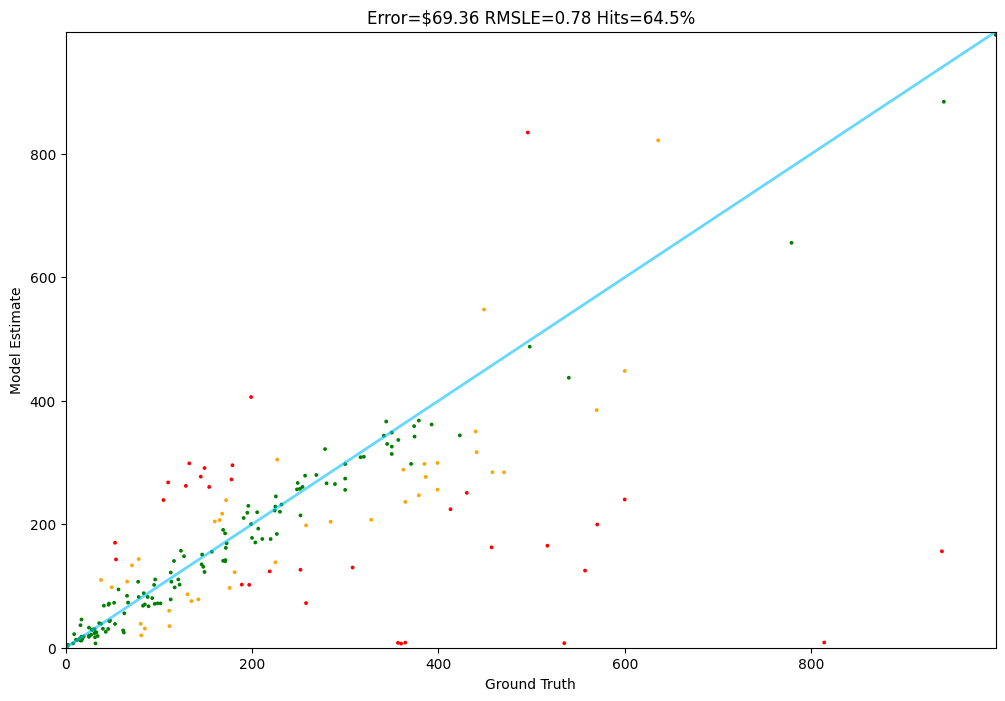

In [6]:
from price_prediction_model_src.evaluation import gpt2_evaluation

results = gpt2_evaluation("price_prediction_peft/price_gpt_2_lora/checkpoint-220000", test_amount=200)